### Importing Dependencies

In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import LabelEncoder

### Loading Dataset

In [121]:
titanic_data = pd.read_csv('/content/train.csv')

In [122]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
#Checking the rows and columns in the dataset
titanic_data.shape

(891, 12)

In [124]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
# Null values in the Dataset
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [126]:
#Unique values in Age feature
titanic_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [127]:
#setting up mean Imputer
imput_mean = SimpleImputer(strategy='mean')

In [128]:
# Fitting and transforming the mean imputer on the Age column
titanic_data[['Age']] = imput_mean.fit_transform(titanic_data[['Age']])

In [129]:
# Checking the null values
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [130]:
# Dropping Unneedec Columns
titanic_data.drop(columns=['PassengerId','Ticket','Cabin'], inplace=True)

In [131]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [132]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [133]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [134]:
imp_mode = SimpleImputer(strategy='most_frequent')

In [135]:
titanic_data[['Embarked']] = imp_mode.fit_transform(titanic_data[['Embarked']])

In [136]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [137]:
# Final Check for Null values
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [138]:
# Loading first 5 rows after imputation
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [139]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualisation


### Survival	0 = No, 1 = Yes

<Axes: xlabel='Survived', ylabel='count'>

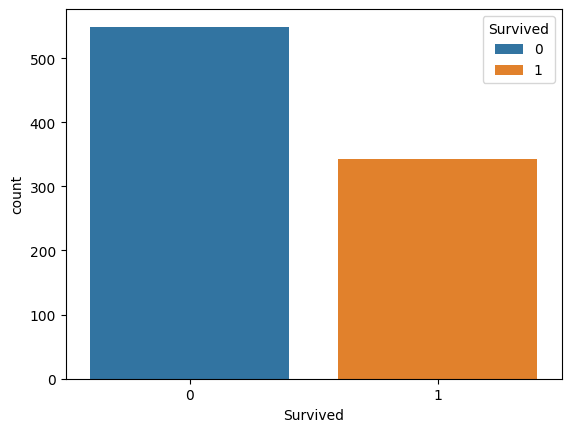

In [140]:
# Plot for Survived
sns.countplot(data=titanic_data,x='Survived',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

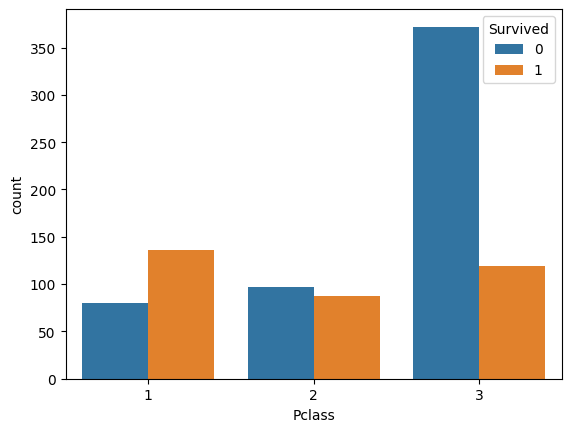

In [141]:
# Plot for Pclass
sns.countplot(data=titanic_data,x='Pclass',hue='Survived')

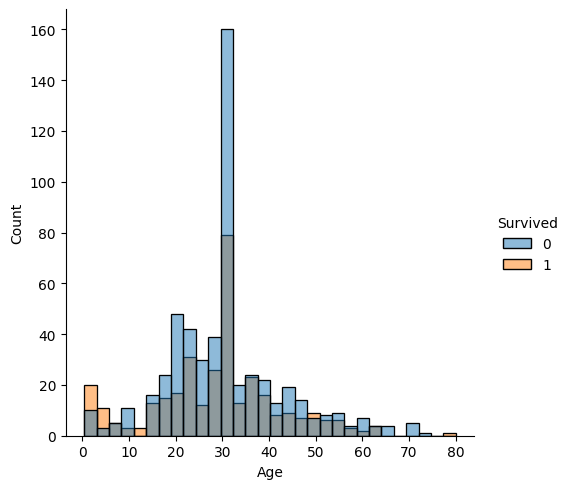

In [142]:
# plot for age
sns.displot(data=titanic_data,x='Age',hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

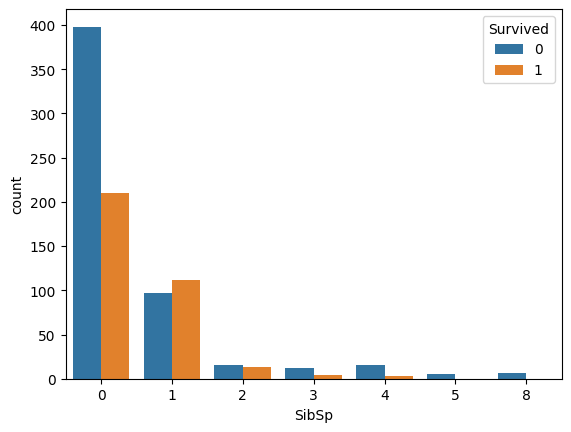

In [143]:
# Number  of siblings / spouses aboard the Titanic
sns.countplot(data=titanic_data,x ='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

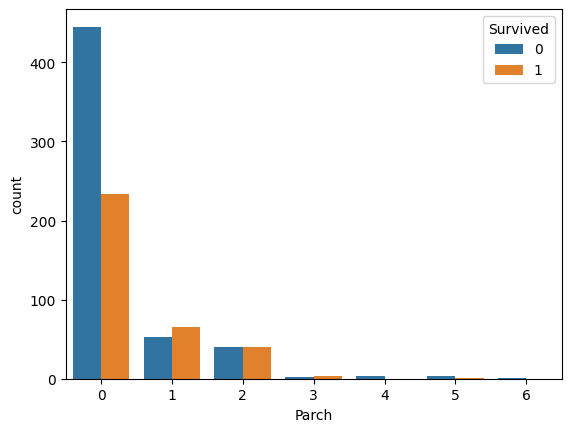

In [144]:
# of parents / children aboard the Titanic
sns.countplot(data=titanic_data,x ='Parch', hue='Survived')

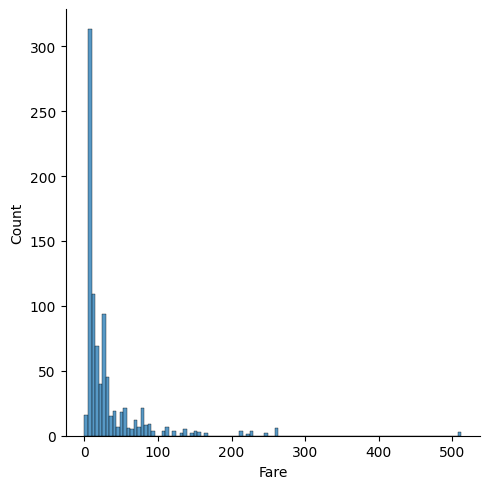

In [145]:
#Passenger fare
sns.displot(data=titanic_data,x ='Fare')

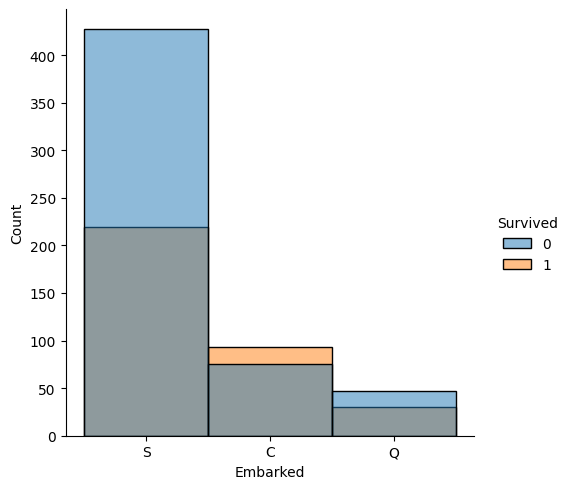

In [146]:
sns.displot(data=titanic_data,x='Embarked',hue='Survived')

In [147]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Data Preprocessing

In [148]:
# setup lable encoder
le = LabelEncoder()

In [149]:
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])

In [150]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,2


In [151]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
2,646
0,168
1,77


## Embarked
S	- 2 ,
C	-  0,
Q	- 1


In [152]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [153]:
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

In [154]:
titanic_data['Sex'].value_counts()

,count
Sex,
1,577
0,314


male	- 1
female	- 0


In [155]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [156]:
# titanic_data.Name.to_list()

In [157]:
!pip install nameparser

In [158]:
# extracting the titles from their names
from nameparser import HumanName
def extract_title(name):
    parsed_name = HumanName(name)
    return parsed_name.title if parsed_name.title else None

# creating new column for title
titanic_data['Title'] = titanic_data['Name'].apply(extract_title)

In [159]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,Mrs.
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,Mrs.
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,Mr.


In [160]:
titanic_data['Title'].value_counts()

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Mme.,1


In [161]:
titanic_data['Title'].isnull().sum()

np.int64(4)

In [162]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,4


In [163]:
titanic_data[['Title']] = imp_mode.fit_transform(titanic_data[['Title']])

In [164]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,4


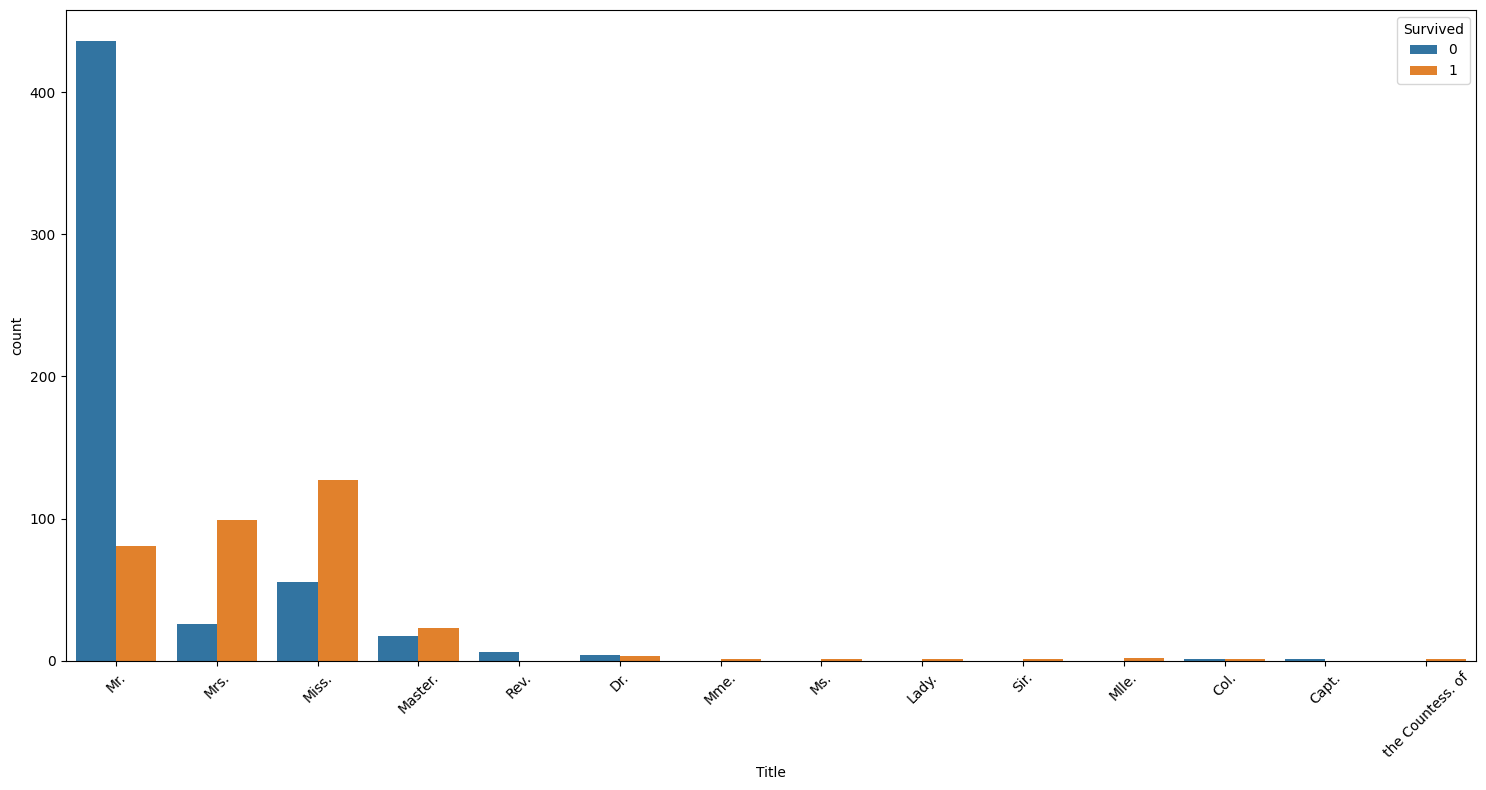

In [167]:
plt.figure(figsize=(15, 8))
sns.countplot(data=titanic_data, x='Title', hue='Survived')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()